In [1]:
import pandas as pd
import arff
from scipy.io import arff as arf
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('../data/kidney_disease.csv', sep=',',na_values=['?'], low_memory=False)
header = data['classification']
data = data.drop(['classification'], axis=1)


In [3]:
data.head(10)


,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,12.4,36.0,NaN,NaN,no,no,no,good,no,no
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes


In [4]:
data.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,376.000000,376.000000,341.000000,342.000000,340.000000,343.000000,367.000000,369.000000,304.000000,303.000000,338.000000,320.000000,286.000000,263.000000
mean,51.364362,76.303191,1.017595,0.985380,0.464706,148.180758,57.420163,3.096070,137.600329,4.633333,12.555030,38.937500,8416.783217,4.706464
std,16.960745,13.658837,0.005669,1.340686,1.113840,80.234940,50.992355,5.834599,10.504390,3.239284,2.936204,9.063128,2956.040168,1.005555
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,41.750000,70.000000,1.015000,0.000000,0.000000,99.500000,27.000000,0.900000,135.000000,3.800000,10.400000,32.000000,6500.000000,3.900000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,121.000000,41.000000,1.200000,138.000000,4.400000,12.750000,40.500000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,162.500000,66.000000,2.800000,142.000000,4.900000,15.000000,45.250000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,6.500000


In [5]:
data.isnull().sum()

id                           0
age                         24
blood pressure              24
specific gravity            59
albumin                     58
sugar                       60
red blood cells            157
pus cell                    76
pus cell clumps             19
bacteria                    19
blood glucose random        57
blood urea                  33
serum creatinine            31
sodium                      96
potassium                   97
hemoglobin                  62
packed cell volume          80
white blood cell count     114
red blood cell count       137
hypertension                17
diabetes mellitus           17
coronary artery disease     17
appetite                    16
pedal edema                 16
anemia                      16
dtype: int64

In [6]:
data = data.drop(['red blood cells'], axis=1)
data = data.drop(['id'], axis=1)

In [7]:
def yesno_to_numeric(x):
        if x=='yes': return 1
        if x=='no':   return 0

def normal_to_numeric(x):
        if x=='normal': return 1
        if x=='abnormal':   return 0

def present_to_numeric(x):
        if x=='notpresent': return 1
        if x=='present':   return 0
        
def good_to_numeric(x):
        if x=='good': return 1
        if x=='poor':   return 0
        
        
        

In [8]:
data['hypertension'] = data['hypertension'].apply(yesno_to_numeric)
data['diabetes mellitus'] = data['diabetes mellitus'].apply(yesno_to_numeric)
data['coronary artery disease'] = data['coronary artery disease'].apply(yesno_to_numeric)
data['pedal edema '] = data['pedal edema '].apply(yesno_to_numeric)
data['anemia '] = data['anemia '].apply(yesno_to_numeric)
data['pus cell'] = data['pus cell'].apply(normal_to_numeric)
data['pus cell clumps'] = data['pus cell clumps'].apply(present_to_numeric)
data['bacteria '] = data['bacteria '].apply(present_to_numeric)
data['appetite'] = data['appetite'].apply(good_to_numeric)

In [9]:
data.head(10)
data.dtypes

age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
pus cell                   float64
pus cell clumps            float64
bacteria                   float64
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension               float64
diabetes mellitus          float64
coronary artery disease    float64
appetite                   float64
pedal edema                float64
anemia                     float64
dtype: object

In [10]:
def fill_with_mean(data):
    for i in range(data.shape[1]):
        mean_value = data[list(data)[i]].mean()
        data[list(data)[i]] = data[list(data)[i]].fillna(mean_value)

In [11]:
fill_with_mean(data)

In [12]:
data.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
dtype: int64

In [13]:
corrmat = data.corr()
corrmat

,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
age,1.000000,0.155226,-0.172668,0.108627,0.217984,-0.129137,-0.159756,-0.048497,0.210902,0.192487,...,-0.179767,-0.220678,0.108020,-0.219536,0.389957,0.356943,0.243507,-0.157677,0.099394,0.048354
blood pressure,0.155226,1.000000,-0.173158,0.128017,0.211325,-0.186834,-0.074040,-0.115462,0.150198,0.180041,...,-0.285832,-0.298635,0.016161,-0.245840,0.269529,0.242776,0.090803,-0.194137,0.061454,0.202351
specific gravity,-0.172668,-0.173158,1.000000,-0.461482,-0.308094,0.350174,0.301066,0.212538,-0.335318,-0.280124,...,0.539609,0.543426,-0.207067,0.490646,-0.370347,-0.393574,-0.165266,0.262502,-0.284974,-0.232052
albumin,0.108627,0.128017,-0.461482,1.000000,0.285033,-0.564744,-0.415188,-0.363522,0.333147,0.401029,...,-0.559978,-0.536736,0.197937,-0.497207,0.475176,0.375729,0.248219,-0.349138,0.447950,0.300128
sugar,0.217984,0.211325,-0.308094,0.285033,1.000000,-0.199435,-0.151127,-0.110984,0.644929,0.155227,...,-0.195862,-0.205288,0.155521,-0.185665,0.302523,0.489876,0.243847,-0.078231,0.132662,0.062220
pus cell,-0.129137,-0.186834,0.350174,-0.564744,-0.199435,1.000000,0.514309,0.319017,-0.285196,-0.393183,...,0.469342,0.465334,-0.127206,0.426466,-0.345831,-0.249387,-0.199387,0.295183,-0.386581,-0.306089
pus cell clumps,-0.159756,-0.074040,0.301066,-0.415188,-0.151127,0.514309,1.000000,0.287265,-0.194079,-0.193399,...,0.282283,0.298444,-0.161769,0.274884,-0.190424,-0.163388,-0.187776,0.173848,-0.107290,-0.178609
bacteria,-0.048497,-0.115462,0.212538,-0.363522,-0.110984,0.319017,0.287265,1.000000,-0.089023,-0.143445,...,0.202309,0.190220,-0.115591,0.189487,-0.101070,-0.070312,-0.166014,0.157379,-0.113584,-0.055264
blood glucose random,0.210902,0.150198,-0.335318,0.333147,0.644929,-0.285196,-0.194079,-0.089023,1.000000,0.134608,...,-0.273706,-0.274378,0.118928,-0.230161,0.372562,0.502481,0.212611,-0.175555,0.103436,0.128909
blood urea,0.192487,0.180041,-0.280124,0.401029,0.155227,-0.393183,-0.193399,-0.143445,0.134608,1.000000,...,-0.543084,-0.528352,0.044360,-0.492542,0.394919,0.317776,0.225403,-0.283594,0.335903,0.442860


NameError: name 'plt' is not defined

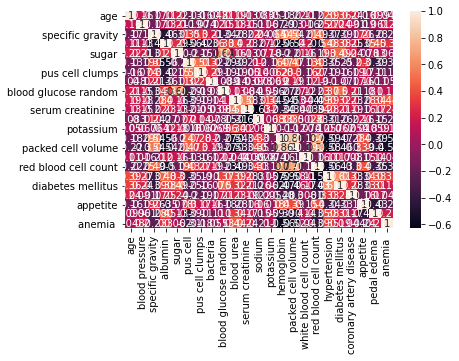

In [14]:
import seaborn as sns
sns.heatmap(corrmat, annot=True)
plt.show()